<a href="https://colab.research.google.com/github/prahladpunia/AI/blob/main/UDEMY_AVCADO_FBPROPHET_PROJECT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


In [13]:
avocado_df = pd.read_csv("avocado.csv")

In [14]:
avocado_df = avocado_df.sort_values("Date")

In [15]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


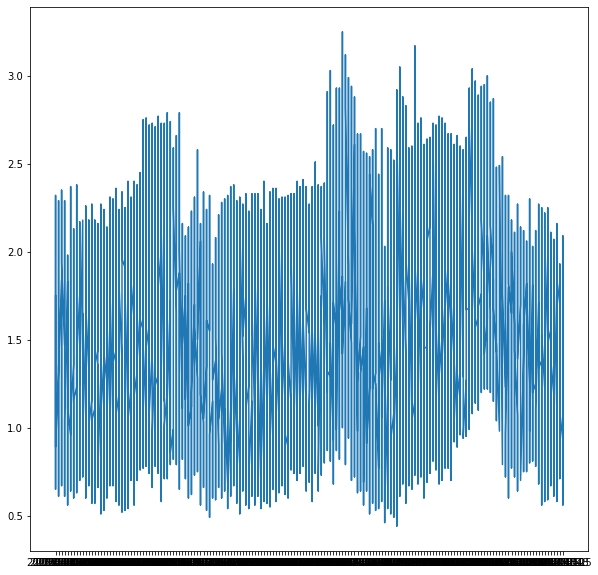

In [16]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df["Date"], avocado_df["AveragePrice"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

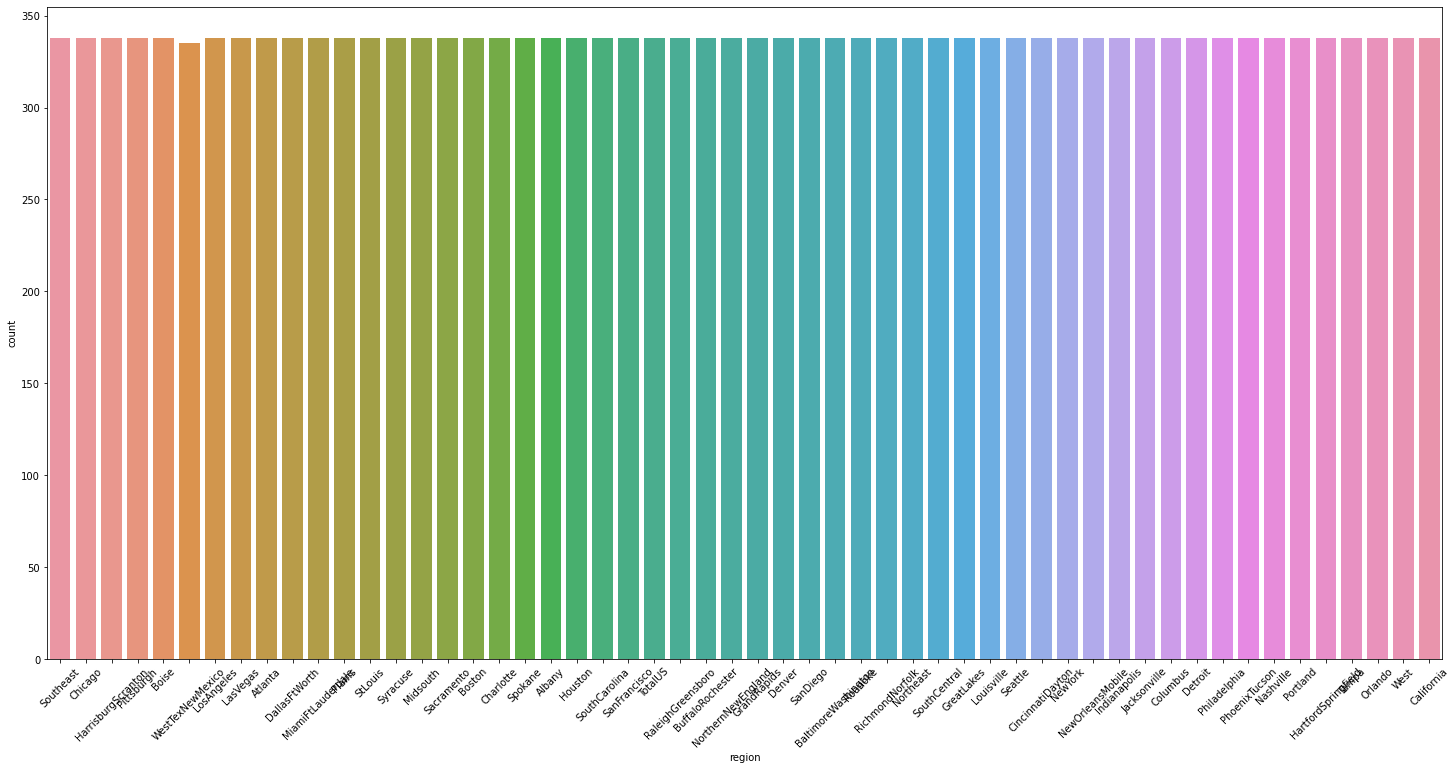

In [17]:
plt.figure(figsize=(25,12))
sns.countplot(x='region', data=avocado_df)
plt.xticks(rotation=45)

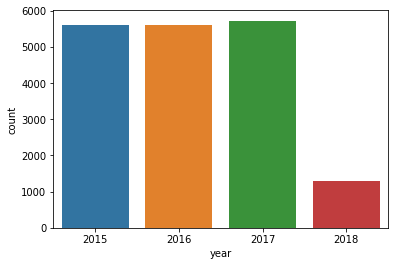

In [19]:
sns.countplot(x='year', data=avocado_df)

In [21]:
avocado_prophet_df = avocado_df[["Date","AveragePrice"]]

In [23]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [24]:
avocado_prophet_df=avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [25]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [28]:
m = Prophet()

In [29]:
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
#forecast the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [31]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.909885,1.859682,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.889891,1.881650,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.903204,1.860764,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.863611,1.853564,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.826060,1.806678,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161735,0.522078,1.612599,0.970286,1.354256,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,0.0,0.0,0.0,1.075537
530,2019-03-22,1.161003,0.538957,1.629556,0.968973,1.354681,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,0.0,0.0,0.0,1.076485
531,2019-03-23,1.160272,0.557784,1.615458,0.967722,1.355107,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,0.0,0.0,0.0,1.077707
532,2019-03-24,1.159540,0.549562,1.589687,0.966806,1.354969,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,0.0,0.0,0.0,1.079182


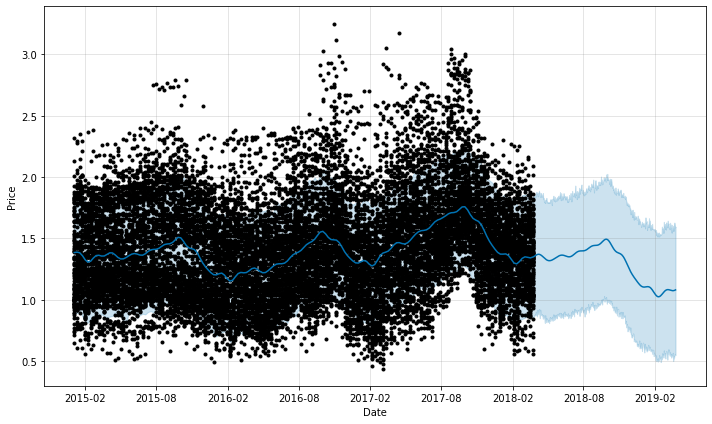

In [32]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

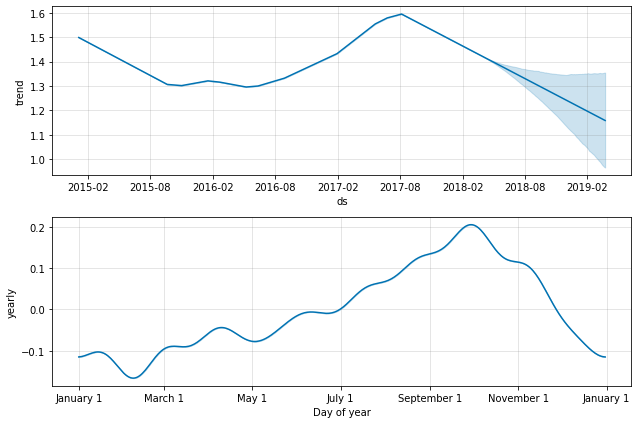

In [33]:
figure = m.plot_components(forecast)